# app.patika.dev Veri Bilimi 101 Modülü - Proje

## Linear Regression with Python Scikit Learn

2 değişken içeren bir veri seti ile basit doğrusal regresyon çalışması. 

**Veri Seti:** Öğrencilerin çalışma saatleri ve bir sınavdan aldıkları notları içeren, 2 sütun ve 25 satırdan oluşan bir veri seti kullandım. Verileri http://bit.ly/w-data adresinden aldım. https://bit.ly/2HxiGGJ adresindeki örnek çözümden kopya çektim :).

In [12]:
# Proje için gerekli kütüphaneleri import ettim.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#link ile verileri alma
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("veriler başarıyla alındı")

veriler başarıyla alındı


In [14]:
#alınan veriler:
s_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


>Burada kullanılan verilerde kategorik değişken ve eksik veri bulunmuyor.
<br>
>Bu nedenle bu adımları atladım.

Verilerden matplotlib kütüphanesini kullanarak 2d eyeball grafiği oluşturma:

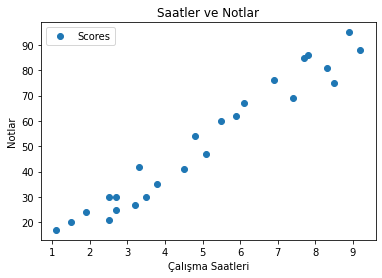

In [16]:
#Öğrencilerin notlarının dağılımı (x: çalışma saati , y: alınan not):
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Saatler ve Notlar')
plt.xlabel('Çalışma Saatleri')
plt.ylabel('Notlar')
plt.show()

>Grafikten gördüğümüz kadarıyla veri setimizde outlier yok :) .

In [20]:
#verileri input ve output olarak ayırma:
saatler = s_data.iloc[:, :-1].values
notlar = s_data.iloc[:, 1].values

In [31]:
#verileri train ve test olarak bölme (scikit-learn train_test_split):
from sklearn.model_selection import train_test_split
saat_train, saat_test, not_train, not_test = train_test_split(saatler,
                                                              notlar,
                                                             test_size=0.2,
                                                             random_state=0)

In [36]:
#train olarak ayırdığımız verileri train ve validation olarak bölecek fonk:
def split_train_val(df,n):
    return df[:n].copy(), df[n:].copy()

In [37]:
#fonksiyonu kullanma
l_valid = 5 #test verileri ile aynı sayıda
l_train = len(saat_train)-l_valid
s_train, s_valid = split_train_val(saat_train, l_train)
l_train = len(not_train)-l_valid
n_train, n_valid = split_train_val(not_train, l_train)

In [49]:
#ilk olarak dersteki RandomForestRegressor'u 1 tree ile kullanıyorum
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time m.fit(s_train, n_train)
m.score(s_train, n_train)

CPU times: total: 31.2 ms
Wall time: 9.97 ms


0.9986639208756128

In [50]:
#rmse ve r^2 ile score bakmak
import math
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [51]:
#rmse ve r^2 ile score bakmak 2
def print_score(m):
    print(f"RMSE train {rmse(m.predict(s_train), n_train)}")
    print(f"RMSE valid {rmse(m.predict(s_valid), n_valid)}")
    print(f"R^2 train {m.score(s_train, n_train)}")
    print(f"R^2 valid {m.score(s_valid, n_valid)}")

In [67]:
#rmse ve r^2 ile score bakmak 3
print_score(m)

RMSE train 4.539538237244775
RMSE valid 8.752142594816426
R^2 train 0.9669602477862653
R^2 valid 0.8849435231915405


>Bu çalışmada kullanılan veriler çok az sayıda olduğu için subsample konusuna girmiyorum.

train'de 15 verimiz olduğu için modeli 3 ağaçla denemek istiyorum.

In [68]:
m2 = RandomForestRegressor(n_estimators=3, bootstrap=True, n_jobs=-1)
%time m2.fit(s_train, n_train)
print_score(m2)

CPU times: total: 0 ns
Wall time: 0 ns
RMSE train 4.0170931078376855
RMSE valid 7.3970714926021
R^2 train 0.9741275700224223
R^2 valid 0.9178132259873428


Tek ağaç kullandığım modelden daha iyi error sonucu aldım. <br>
Şimdi de LinearRegression ile denemek istiyorum.

In [70]:
from sklearn.linear_model import LinearRegression
m3 = LinearRegression()
%time m3.fit(s_train, n_train)
print_score(m3)

CPU times: total: 0 ns
Wall time: 998 µs
RMSE train 4.976821994686867
RMSE valid 7.254145388684697
R^2 train 0.9602883767349093
R^2 valid 0.9209585656690467


Bu model öncekilerden daha iyi sonuç veriyor gibi görünüyor.

Şimdi bu 3 modeli de test verileriyle çalıştırıp aradaki farkı görmek istiyorum.

In [74]:
def print_score_test(m,m2,m3):
    print("-------------m-----------")
    print()
    print(f"RMSE train {rmse(m.predict(s_train), n_train)}")
    print(f"RMSE valid {rmse(m.predict(s_valid), n_valid)}")
    print(f"RMSE test {rmse(m.predict(saat_test), not_test)}")
    print(f"R^2 train {m.score(s_train, n_train)}")
    print(f"R^2 valid {m.score(s_valid, n_valid)}")
    print(f"R^2 test {m.score(saat_test, not_test)}")
    print()
    print("-------------m2-----------")
    print()
    print(f"RMSE train {rmse(m2.predict(s_train), n_train)}")
    print(f"RMSE valid {rmse(m2.predict(s_valid), n_valid)}")
    print(f"RMSE test {rmse(m2.predict(saat_test), not_test)}")
    print(f"R^2 train {m2.score(s_train, n_train)}")
    print(f"R^2 valid {m2.score(s_valid, n_valid)}")
    print(f"R^2 test {m2.score(saat_test, not_test)}")
    print()
    print("-------------m3-----------")
    print()    
    print(f"RMSE train {rmse(m3.predict(s_train), n_train)}")
    print(f"RMSE valid {rmse(m3.predict(s_valid), n_valid)}")
    print(f"RMSE test {rmse(m3.predict(saat_test), not_test)}")
    print(f"R^2 train {m3.score(s_train, n_train)}")
    print(f"R^2 valid {m3.score(s_valid, n_valid)}")
    print(f"R^2 test {m3.score(saat_test, not_test)}")

In [75]:
print_score_test(m,m2,m3)

-------------m-----------

RMSE train 4.539538237244775
RMSE valid 8.752142594816426
RMSE test 10.253454702359267
R^2 train 0.9669602477862653
R^2 valid 0.8849435231915405
R^2 test 0.7346725890032977

-------------m2-----------

RMSE train 4.0170931078376855
RMSE valid 7.3970714926021
RMSE test 8.138045083297204
R^2 train 0.9741275700224223
R^2 valid 0.9178132259873428
R^2 test 0.832859434237387

-------------m3-----------

RMSE train 4.976821994686867
RMSE valid 7.254145388684697
RMSE test 4.958007722126245
R^2 train 0.9602883767349093
R^2 valid 0.9209585656690467
R^2 test 0.9379622436587334


Son olarak aldığım çıktıda denediğim 3 modelden son 2'si (3 decision tree ve linear regression) validation verilerinde birbirine çok yakın error almasına rağmen, test verilerinde linear regression daha az hata ile çalışmış.